In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
# 판다스로 만들기
import pandas as pd
perch_data = [[l, w] for l, w in zip(perch_length, perch_weight)]
perch_df = pd.DataFrame(perch_data,columns=['길이','무게'])
perch_df.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [3]:
perch = pd.DataFrame({'길이' :perch_length,'무게' :perch_weight})
perch.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [4]:
perch.describe() #전처리 여부 혹은 모델 선정에 따른 전처리 필요성 의식

,길이,무게
count,56.000000,56.000000
mean,27.892857,382.239286
std,9.021668,347.617717
min,8.400000,5.900000
25%,21.825000,120.000000
50%,25.300000,207.500000
75%,36.625000,692.500000
max,44.000000,1100.000000


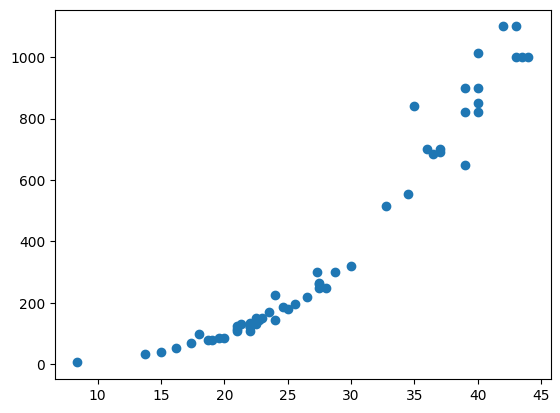

In [5]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도를 그립니다
plt.scatter(perch_df['길이'], perch_df['무게'])
plt.show()

## 데이터 셋 준비

In [6]:
from sklearn.model_selection import train_test_split

# 데이터프레임에서 feature와 label의 분리작업
y_target = perch['무게']
# type(y_target)

X_data = perch.drop(['무게'],axis=1)
# X_data.head()

X_train,X_test,y_train,y_test =  train_test_split(X_data,y_target,test_size=0.3,random_state=42)

In [7]:
type(X_train),type(X_test),type(y_train),type(y_test)


(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [8]:
X_train.shape

(39, 1)

In [9]:
X_test.shape

(17, 1)

In [10]:
y_train.shape

(39,)

## 모델학습

In [11]:
#sklearn.linear_mode 패키지 아래에 선형회귀 알고리즘을 구현해놓은 클래스가 있음
from sklearn.linear_model import LinearRegression

# Linear Regression 학습/예측 
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)

In [12]:
import warnings
warnings.filterwarnings('ignore') 

# 50cm 농어에 대한 예측

lr.predict([[50]])

array([1245.42393074])

In [13]:
lr.coef_ ,lr.intercept_

(array([39.27726005]), -718.4390718914794)

---
**[농어 무게 예측 방정식]**

$y = 39.27*x - 718.43$

---

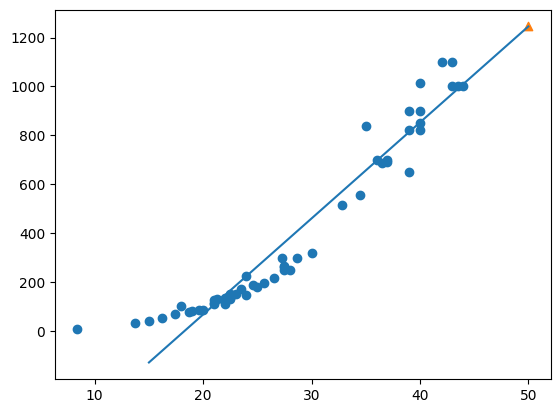

In [14]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도를 그립니다
plt.scatter(perch_df['길이'], perch_df['무게'])


plt.plot([15,50],[  15 * lr.coef_ + lr.intercept_,      50 * lr.coef_ + lr.intercept_])
plt.scatter(50,1245.42, marker='^')
plt.show()

## 선형 회귀 평가

In [15]:
from sklearn.metrics import mean_squared_error , r2_score

#MSE : 에러들의 평균
mse = mean_squared_error(y_test ,preds )

#RMSE : 에러들의 평균에다가 루트
rmse = np.sqrt(mse)

#R^2 : 실제와 예측의 분산비교
r2 = r2_score( y_test  , preds)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 15122.391 , RMSE : 122.973
Variance score : 0.832


In [16]:
lr.score(X_train,y_train)


0.9371680443381393

In [17]:
lr.score(X_test,y_test)

0.8324765337629763

> * 훈련세트 성능점수는 93.7%, 테스트세트 성능점수는 83.24%
> * 테스트 세트에 대해서 성능이 10% 떨어진 것으로 보아 과적합이 발생한 것 같다. 
> * 무게가 음수로 예측된다니..... 성능이 안 좋은 모델입니다. 